In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2.0,0.00,1,1.0,1,101348.88,1.0
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1,0.0,1,112542.58,0.0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3,1.0,0,113931.57,1.0
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,2,0.0,0,93826.63,0.0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1,1.0,1,79084.10,0.0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,15
Age,98
Tenure,142
Balance,292
NumOfProducts,0


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Tenure'].fillna(df['Tenure'].mode()[0],inplace=True)
df['Balance'].fillna(df['Balance'].mean(),inplace=True)
df['HasCrCard'].fillna(df['HasCrCard'].mode()[0],inplace=True)
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(),inplace=True)

/tmp/ipython-input-866761806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/tmp/ipython-input-866761806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df.dropna(subset=['Exited'], inplace=True)

In [ ]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [ ]:
df.isnull().sum()

,0
CreditScore,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [ ]:
import pandas as pd

# 1. Drop identifier / non-useful columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True, errors='ignore')

# 2. Encode Gender (Binary Encoding)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# 3. One-Hot Encode Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
max_credit_score = df['CreditScore'].max()
print(max_credit_score)


850


In [ ]:
min_credit_score = df['CreditScore'].min()
print(min_credit_score)

350


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
model1=LogisticRegression()
model1.fit(x_train,y_train)


LogisticRegression()

In [ ]:
y_pred1=model1.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred1)

0.8028028028028028

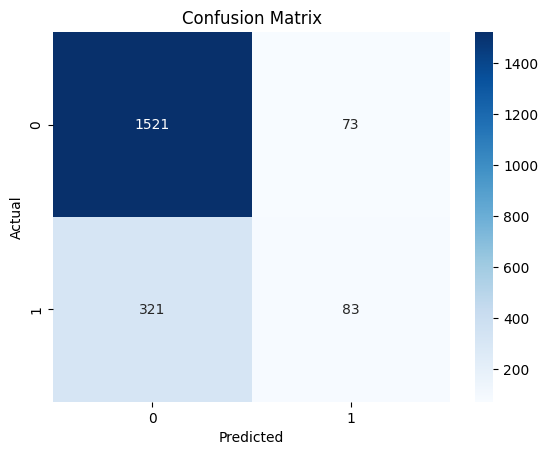

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred1)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
xticklabels=['Not Effective','Effective']
yticklabels=['Not Effective','Effective']
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred2=model2.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.7887887887887888

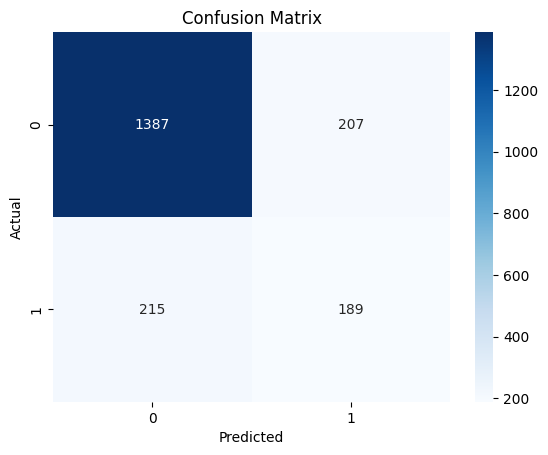

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred2)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
xticklabels=['Not Effective','Effective']
yticklabels=['Not Effective','Effective']
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred3=model3.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.867

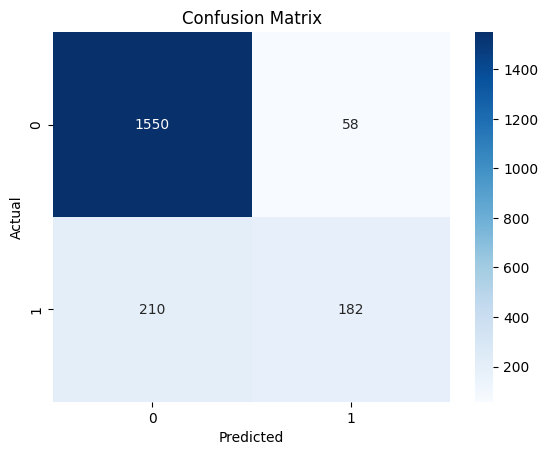

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred3)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
xticklabels=['Not Effective','Effective']
yticklabels=['Not Effective','Effective']
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
k=5
model4=KNeighborsClassifier()
model4.fit(x_train,y_train)


KNeighborsClassifier()

In [ ]:
y_pred4=model4.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.829

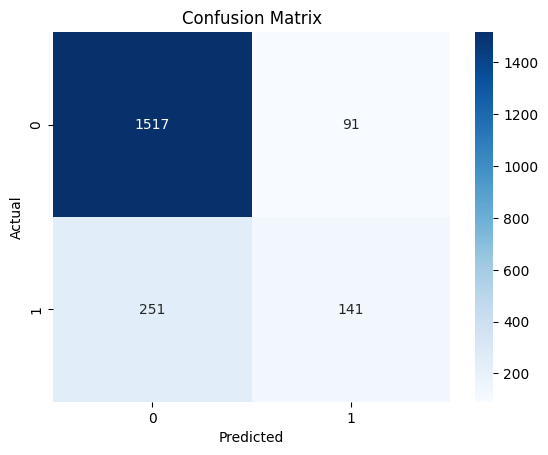

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred4)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
xticklabels=['Not Effective','Effective']
yticklabels=['Not Effective','Effective']
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

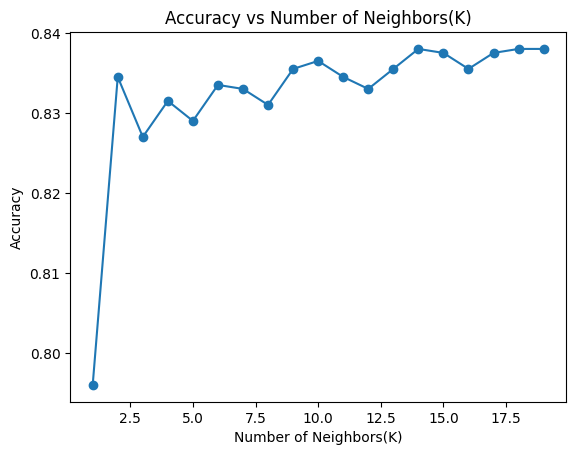

In [ ]:
accuracy_scores=[]
k_values = range(1,20)

for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy_scores.append(accuracy_score(y_test, y_pred))


plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors(K)')
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(x_train, y_train)


SVC()

In [ ]:
y_pred5=model5.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.8575

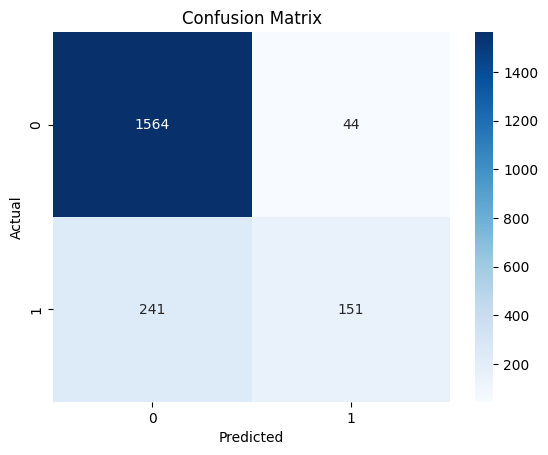

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred5)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
xticklabels=['Not Effective','Effective']
yticklabels=['Not Effective','Effective']
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [311]:
import gradio as gr
import pandas as pd
import numpy as np

# Ensure loaded_model, scaler, and x (original dataframe for column alignment) are available
# These objects were created and are available in the current kernel state.

def predict_churn(credit_score, geography, gender, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary):
    # Create a dictionary for the new data point
    data = {
        'CreditScore': credit_score,
        'Gender': gender, # Will be mapped below
        'Age': age,
        'Tenure': tenure,
        'Balance': balance,
        'NumOfProducts': num_of_products,
        'HasCrCard': has_cr_card,
        'IsActiveMember': is_active_member,
        'EstimatedSalary': estimated_salary,
        # Initialize one-hot encoded geography columns
        'Geography_Germany': 0,
        'Geography_Spain': 0
    }

    # Create a DataFrame from the single data point
    sample_df = pd.DataFrame([data])

    # Apply preprocessing steps similar to training
    # 1. Encode Gender (Binary Encoding)
    sample_df['Gender'] = sample_df['Gender'].map({'Male': 0, 'Female': 1})

    # 2. One-Hot Encode Geography
    if geography == 'Germany':
        sample_df['Geography_Germany'] = 1
    elif geography == 'Spain':
        sample_df['Geography_Spain'] = 1
    # 'France' implies both 'Geography_Germany' and 'Geography_Spain' remain 0

    # Ensure the order of columns matches the training data (x.columns)
    # x is a DataFrame in the kernel state that holds the preprocessed features before scaling.
    # Its columns represent the expected input features for the model.
    final_features_df = sample_df.reindex(columns=x.columns, fill_value=0)

    # 3. Scale numerical features using the pre-fitted scaler
    scaled_input = scaler.transform(final_features_df)

    # 4. Make prediction
    prediction = loaded_model.predict(scaled_input)[0]
    prediction_proba = loaded_model.predict_proba(scaled_input)[0]

    # 5. Return human-readable result
    if prediction == 1:
        return f"Prediction: Customer will churn (Probability: {prediction_proba[1]:.2f})"
    else:
        return f"Prediction: Customer will not churn (Probability: {prediction_proba[0]:.2f})"

# Define Gradio input components
credit_score_input = gr.Slider(minimum=350, maximum=850, step=1, value=650, label='Credit Score')
geography_input = gr.Dropdown(choices=['France', 'Germany', 'Spain'], value='France', label='Geography')
gender_input = gr.Radio(choices=['Male', 'Female'], value='Male', label='Gender')
age_input = gr.Slider(minimum=18, maximum=92, step=1, value=35, label='Age') # Max age based on common demographics for dataset types
tenure_input = gr.Slider(minimum=0, maximum=10, step=1, value=5, label='Tenure (years)')
balance_input = gr.Slider(minimum=0.0, maximum=250000.0, step=100.0, value=80000.0, label='Balance') # Max balance based on typical dataset ranges
num_of_products_input = gr.Slider(minimum=1, maximum=4, step=1, value=1, label='Number of Products')
has_cr_card_input = gr.Radio(choices=[0, 1], value=1, label='Has Credit Card (0=No, 1=Yes)')
is_active_member_input = gr.Radio(choices=[0, 1], value=1, label='Is Active Member (0=No, 1=Yes)')
estimated_salary_input = gr.Slider(minimum=0.0, maximum=200000.0, step=100.0, value=95000.0, label='Estimated Salary') # Max salary based on typical dataset ranges

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_churn,
    inputs=[
        credit_score_input,
        geography_input,
        gender_input,
        age_input,
        tenure_input,
        balance_input,
        num_of_products_input,
        has_cr_card_input,
        is_active_member_input,
        estimated_salary_input
    ],
    outputs='text',
    title='Customer Churn Prediction',
    description='Enter customer details to predict if they will churn (exit the bank).'
)

# Launch the interface
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://221ce872c17a6a8b56.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
